epochs: 0
epochs: 10000
[ 0. -1.] [[0.6688637]]
[0. 1.] [[0.47895352]]
[1. 0.] [[0.50432069]]
[-1.  0.] [[0.5088423]]
[ 0.42496802 -2.64762792] [[0.50441164]]
[-0.10131054  1.176939  ] [[0.50224733]]
[0.52502783 1.85372154] [[0.53463593]]
[0.83927604 1.43925258] [[0.50463182]]
[-1.6114795   0.60800971] [[0.50884283]]
[-1.88950037  0.70290821] [[0.50884283]]
[-0.75801017 -1.11783266] [[0.50877892]]
[ 0.98472684 -1.12661064] [[0.5043172]]
[-0.56475186 -1.23036054] [[0.50797997]]
[-0.36416127  1.11396575] [[0.50857227]]
[-0.78470761 -1.06003551] [[0.50880109]]
[-1.49370614  0.52102444] [[0.50884283]]
[-0.98270337  2.16349001] [[0.50884281]]
[-1.01955339 -0.2046262 ] [[0.50884226]]
[-1.86673475  0.82402997] [[0.50884283]]
[0.56764425 1.25275877] [[0.51140925]]
[-1.46417012  0.43819638] [[0.50884283]]
[-0.15204204  2.37671899] [[0.50830784]]
[1.3648757  0.51059828] [[0.50431639]]
[1.10563848 0.71880028] [[0.50431989]]
[-1.13919641 -0.74754353] [[0.50884253]]
[-2.02123938 -0.76056331] [[0.50

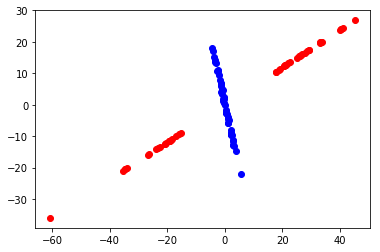

In [175]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-3*x))

def sigmoid_prime(x):
    return sigmoid(x)*(1.0-sigmoid(x))

class NeuralNetwork:

    def __init__(self, layers, activation='sigmoid'):
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_prime = sigmoid_prime
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_prime = tanh_prime

        # Set weights
        self.weights = []
        # layers = [2,2,1]
        # range of weight values (-1,1)
        # input and hidden layers - random((2+1, 2+1)) : 3 x 3
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
        # output layer - random((2+1, 1)) : 3 x 1
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.01, epochs=10500):
        # Add column of ones to X
        # This is to add the bias unit to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
         
        for k in range(epochs):
            weight_changes = [0]*(len(self.weights))
            if k % 10000 == 0: print ('epochs:', k)
            for m in range(0,10): 
                data0 = 0
                data1 = 0
                balance = True
                i = np.random.randint(X.shape[0])
                while(balance): 
                    if y[i] == 0 and data0 == 5: 
                        i = np.random.randint(X.shape[0])
                    elif y[i] == 0 and data1 == 5: 
                        i = np.random.randint(X.shape[0])
                    else: 
                        balance = False 
                if y[i] == 0 : 
                    data0 += 1 
                else: 
                    data1 += 1 
                a = [X[i]]
     
                for l in range(len(self.weights)):
                        dot_value = np.dot(a[l], self.weights[l])
                        activation = self.activation(dot_value)
                        a.append(activation)
                # output layer
                error = a[-1] - y[i]
                deltas = [error]

                # we need to begin at the second to last layer 
                # (a layer before the output layer)
                for l in range(len(a) - 2, 0, -1): 
                    deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))

                # reverse
                # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
                deltas.reverse()

                # backpropagation
                # 1. Multiply its output delta and input activation 
                #    to get the gradient of the weight.
                # 2. Subtract a ratio (percentage) of the gradient from the weight.
                for i in range(len(self.weights)):
                    layer = np.atleast_2d(a[i])
                    delta = np.atleast_2d(deltas[i])
                    weight_changes[i] -= learning_rate * layer.T.dot(delta)
                    
            for i in range(len(self.weights)): 
                self.weights[i] = np.add(self.weights[i],weight_changes[i])
                
    def predict(self, x): 
        a = np.concatenate((np.array([[1]]), np.array([x])), axis=1)      
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

if __name__ == '__main__':

    nn = NeuralNetwork([2,2,2,1])

    X = np.array([[0, -1],
                  [0, 1],
                  [1, 0],
                  [-1, 0]])

    y = np.array([1, 1, 0, 0])
    class1 = 2
    class2 = 2
    while len(X) < 100: 
        val = np.random.normal(size = 2)
        val1 = abs(val[0])
        val2 = abs(val[1])
        if ((val1 > 1) and (val2 < 1)): 
            if class1 < 50: 
                label = 0
                y = np.append(y,label)
                val = [val]
                X = np.append(X,val,axis=0)
                class1 +=1
            else: continue
        if ((val1 < 1) and (val2 > 1)):
            if class2 < 50: 
                label = 1 
                y = np.append(y,label)
                val = [val]
                X = np.append(X,val,axis=0)
                class2 +=1
            else: continue
        else: 
            continue

    nn.fit(X, y)
    #print(nn.weights)
    index = 0 
    misclassified = 0
    wrong = 0 
    for e in X:
        out = nn.predict(e)
        comp = y[index]
        print(e, out)
        if abs(out-comp) >= 0.5: 
            misclassified += 1
            index += 1
        else:
            index += 1
            continue
    ones = np.atleast_2d(np.ones(X.shape[0]))
    x = np.concatenate((ones.T, X), axis=1)
    print(misclassified)
    print(nn.weights)
    
    x_axis1 = []
    y_axis1 = []
    x_axis0 = []
    y_axis0 = []
    layer1 = (np.matmul(x,nn.weights[0]))
    layer2 = (np.matmul(layer1,nn.weights[1]))
    print(nn.predict(X[0]))
    for i in range (0,99): 
        if y[i] == 0: 
            x_axis0.append(layer2[i][0])
            y_axis0.append(layer2[i][1])
            #x_axis0.append(nn.predict(X[i])[0])
            #y_axis0.append(0)
        if y[i] == 1: 
            x_axis1.append(layer1[i][0])
            y_axis1.append(layer1[i][1])
            #if (nn.predict(X[i])[0]) <0.5: 
                #continue
           #else: 
                #x_axis1.append(nn.predict(X[i])[0])
                #y_axis1.append(0)
    plt.figure()
    plt.scatter(x_axis0,y_axis0, color = 'r')
    plt.scatter(x_axis1,y_axis1, color = 'b')
    plt.show()
